In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits as pf
from keckcode_test.keckcode.esiredux import esi2d, esi1d
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'J0248' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)

In [4]:
spec2d_file_list

['../galaxy_spectra/ESI_data/J0248+1913_0035_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0034_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0036_bgsub.fits']

In [5]:
var2d_file_list

['../galaxy_spectra/ESI_data/J0248+1913_0035_var.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0036_var.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0034_var.fits']

In [6]:
spec = esi2d.Esi2d(spec2d_file_list[1], varfile=var2d_file_list[2])
print(spec2d_file_list[1])
print(var2d_file_list[2])

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
../galaxy_spectra/ESI_data/J0248+1913_0034_bgsub.fits
../galaxy_spectra/ESI_data/J0248+1913_0034_var.fits


## WFC3 instrument in HST has a pixel scale of 0.04 arcsec/pix.

### According to header file the slit position for J0630 is -47.999 deg (north through east). A vector parallel to the slit shows that the distance from around the middle of quasar image 'A' and 'B', and the image 'E'  is 1.830 arc sec. Then a vector from the center of the deflector near image 'E' and to the image itself shows that the angle is 42.863 (angle calculated from due east) and the distance is 0.357. The center to center distance between image 'E' and 'D' is 1.07 arc sec if the vector is almost parallel to slit (-47 deg north through east). And the distance between the deflector near image 'D' and the image itself is 0.358 arc sec if a vector is drawn from the deflector with an angle 25.409 deg (angle calculated from due east).

### According to header file the slit position for J0147 is 7.3 deg (north through east).  If we draw vectors from the deflector to quasar images 'A'(up-middle) and  'D' (down) parallel to the slit then the center to center distances between deflector and these images are around 1.95 and 1.2 arc sec (according to HST image).

### Acording to the header the slit position angle for J0248 system is 100 deg (north to east). If we draw vectors from the deflector to quasar images 'A'(down-right), 'B'(up-right), 'C' (down-left) and 'D' (up-left), then the angles of the vectors are around (north through east) 252.5, 322, 156  and 33.5 deg  respectively. And the center to center distances between deflector and these images are around 0.72, 0.843, 0.9 and 0.765 arc sec (according to HST image).

Profile max value (before normalization) 29.680112


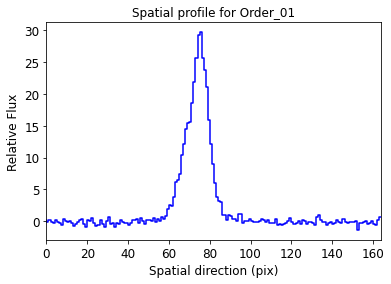


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 0.5

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 8, 63, 2

amplitude=8.000000, mu=63.000000, sigma=2.000000

Parameters of Gaussian profile 2 : 15, 68, 2

amplitude=15.000000, mu=68.000000, sigma=2.000000

Parameters of Gaussian profile 3 : 27, 76, 2

amplitude=27.000000, mu=76.000000, sigma=2.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.02786412)>

    [1]: <Gaussian1D(amplitude=5.33954985, mean=65.03318823, stddev=2.99309025)>

    [2]: <Gaussian1D

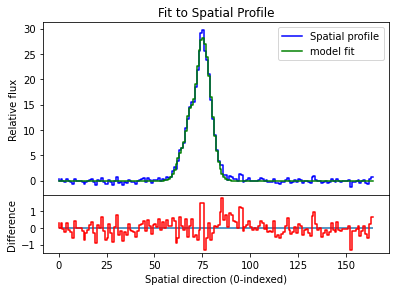

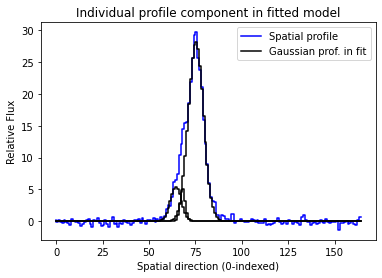


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 20.751202


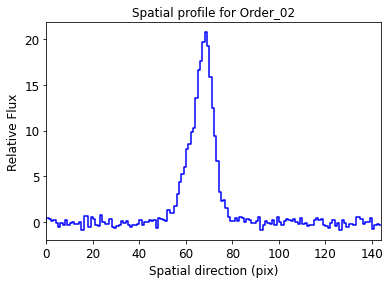


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0


KeyboardInterrupt: Interrupted by user

In [7]:
pixrange = [1900, 2400]
for sp, info in zip(spec, spec.ordinfo):
    title = 'Spatial profile for ' + str(info['name'])
    sp.spatial_profile(pixrange=pixrange, title=title)
    plt.show()
    sp.initial_model()

### The left most Gaussian profile is from two left images. As they are not directly in the slit so I have used the avarage of their projected distances parallel to the slit from the deflector which is 0.5*(0.9cos56 + .0.765cos66.5)=0.404. The pixel scale of the HST (WFC3) instrument is 0.04 arcsec/pixel. So according to the image that means 10.104 pixel.
### Similarly the right most Gaussian profile is from the right two images. As both of them are partly on the slit I have also used the avarage projected distance along the slit from the deflector which is 0.5(0.72cos27.5 +0.843cos42)=0.633. 

In [ ]:
def tie_pos1_gauss_1(model):
    return model.mean_3 - (1.037 / spec.ordinfo[0]['pixscale'])

def tie_pos2_gauss_1(model):
    return model.mean_3 - (0.633 / spec.ordinfo[0]['pixscale'])

def tie_pos1_gauss_2(model):
    return model.mean_3 - (1.037 / spec.ordinfo[1]['pixscale'])

def tie_pos2_gauss_2(model):
    return model.mean_3 - (0.633 / spec.ordinfo[1]['pixscale'])

def tie_pos1_gauss_5(model):
    return model.mean_3 - (1.037 / spec.ordinfo[4]['pixscale'])  

def tie_pos2_gauss_5(model):
    return model.mean_3 - (0.633 / spec.ordinfo[4]['pixscale'])

def tie_pos1_gauss_8(model):
    return model.mean_3 - (1.037 / spec.ordinfo[7]['pixscale'])

def tie_pos2_gauss_8(model):
    return model.mean_3 - (0.633 / spec.ordinfo[7]['pixscale'])

def tie_pos1_gauss_9(model):
    return model.mean_3 - (1.037 / spec.ordinfo[8]['pixscale'])

def tie_pos2_gauss_9(model):
    return model.mean_3 - (0.633 / spec.ordinfo[8]['pixscale'])


def tie_stddev(model):
    return model.stddev_3


func_dict = {'1_1' : tie_pos1_gauss_1, '1_2' : tie_pos2_gauss_1,
             '2_1' : tie_pos1_gauss_2, '2_2' : tie_pos2_gauss_2,
             #'3_1' : tie_pos1_gauss_3, '3_2' : tie_pos2_gauss_3,
             #'4_1' : tie_pos1_gauss_4, '4_2' : tie_pos2_gauss_4,
             '5_1' : tie_pos1_gauss_5, '5_2' : tie_pos2_gauss_5,
             #'6_1' : tie_pos1_gauss_6, '6_2' : tie_pos2_gauss_6,
             #'7_1' : tie_pos1_gauss_7, '7_2' : tie_pos2_gauss_7,
             '8_1' : tie_pos1_gauss_8, '8_2' : tie_pos2_gauss_8,
             '9_1' : tie_pos1_gauss_9, '9_2' : tie_pos2_gauss_9,
             #'10_1' : tie_pos1_gauss_10, '10_2' : tie_pos2_gauss_10
            }
    
for sp, info in zip(spec, spec.ordinfo):
    if sp.mod0 is not None:
        print(info['pixscale'])
        #sp.mod0[1].mean.tied = func_dict['%d_%d' %(info['order'], 1)] #tie_pos1_gauss_
        #sp.mod0[2].mean.tied = func_dict['%d_%d' %(info['order'], 2)] #tie_pos2_gauss
        sp.mod0[1].stddev.tied = tie_stddev
        sp.refined_model(sp.mod0)